# EDA PAWS Dataset for the NLP Project
## The dataset consists of PAWS Quora + Wikipedia + Paraphrase + Semantic Similarity 

### Import libraries and load dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('merged_file.csv')


### Preview dataset

In [39]:
# Preview the first 5 rows of the dataset
data.head()

,id,sentence1,sentence2,label
0,1,"In Paris , in October 1560 , he secretly met t...","In October 1560 , he secretly met with the Eng...",0
1,2,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...,1
2,3,"There are also specific discussions , public p...","There are also public discussions , profile sp...",0
3,4,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...,1
4,5,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...,1


### Dataset shape and info

In [40]:
# Check the shape of the dataset
print("Dataset shape:", data.shape)

# Check dataset info (data types, missing values, etc.)
data.info()

Dataset shape: (61387, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61387 entries, 0 to 61386
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         61387 non-null  int64 
 1   sentence1  61387 non-null  object
 2   sentence2  61387 non-null  object
 3   label      61387 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


### Check for duplicate rows

In [41]:
# Check for duplicate rows in the dataset
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


### Check class distribution (label)

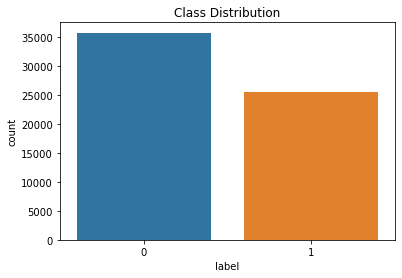

In [42]:
# Check the distribution of the 'label' column
sns.countplot(x='label', data=data)
plt.title("Class Distribution")
plt.show()

### Analyze sentence lengths

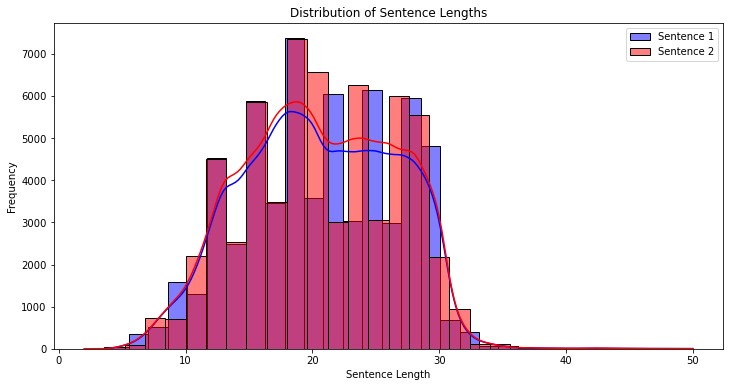

In [43]:
# Create new columns for the length of each sentence
data['sentence1_len'] = data['sentence1'].apply(lambda x: len(x.split()))
data['sentence2_len'] = data['sentence2'].apply(lambda x: len(x.split()))

# Plot the distribution of sentence lengths
plt.figure(figsize=(12, 6))
sns.histplot(data, x='sentence1_len', bins=30, kde=True, color='blue', label='Sentence 1')
sns.histplot(data, x='sentence2_len', bins=30, kde=True, color='red', label='Sentence 2')
plt.legend()
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.show()


### Analyze the relationship between word overlap and labels

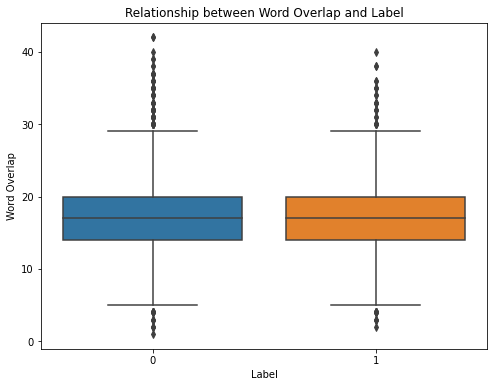

In [44]:
# Function to calculate word overlap
def word_overlap(sentence1, sentence2):
    words1 = set(sentence1.split())
    words2 = set(sentence2.split())
    common_words = words1.intersection(words2)
    return len(common_words)

# Create a new column for word overlap
data['word_overlap'] = data.apply(lambda row: word_overlap(row['sentence1'], row['sentence2']), axis=1)

# Box plot of word overlap vs. label
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='word_overlap', data=data)
plt.title("Relationship between Word Overlap and Label")
plt.xlabel("Label")
plt.ylabel("Word Overlap")
plt.show()

## NLTK Analysis on sentences and structures

In [45]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ParagGhorpade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ParagGhorpade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ParagGhorpade\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Tokeninzing sentences 

In [46]:
from nltk.tokenize import word_tokenize

# Tokenize sentences
data['tokens1'] = data['sentence1'].apply(lambda x: word_tokenize(x.lower()))
data['tokens2'] = data['sentence2'].apply(lambda x: word_tokenize(x.lower()))

# Preview tokenized sentences
data[['sentence1', 'tokens1', 'sentence2', 'tokens2']].head()


,sentence1,tokens1,sentence2,tokens2
0,"In Paris , in October 1560 , he secretly met t...","[in, paris, ,, in, october, 1560, ,, he, secre...","In October 1560 , he secretly met with the Eng...","[in, october, 1560, ,, he, secretly, met, with..."
1,The NBA season of 1975 -- 76 was the 30th seas...,"[the, nba, season, of, 1975, --, 76, was, the,...",The 1975 -- 76 season of the National Basketba...,"[the, 1975, --, 76, season, of, the, national,..."
2,"There are also specific discussions , public p...","[there, are, also, specific, discussions, ,, p...","There are also public discussions , profile sp...","[there, are, also, public, discussions, ,, pro..."
3,When comparable rates of flow can be maintaine...,"[when, comparable, rates, of, flow, can, be, m...",The results are high when comparable flow rate...,"[the, results, are, high, when, comparable, fl..."
4,It is the seat of Zerendi District in Akmola R...,"[it, is, the, seat, of, zerendi, district, in,...",It is the seat of the district of Zerendi in A...,"[it, is, the, seat, of, the, district, of, zer..."


### Stopword removal 

In [47]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from tokenized sentences
data['tokens1_no_stopwords'] = data['tokens1'].apply(lambda x: [word for word in x if word not in stop_words])
data['tokens2_no_stopwords'] = data['tokens2'].apply(lambda x: [word for word in x if word not in stop_words])

# Preview sentences without stopwords
data[['tokens1', 'tokens1_no_stopwords', 'tokens2', 'tokens2_no_stopwords']].head()


,tokens1,tokens1_no_stopwords,tokens2,tokens2_no_stopwords
0,"[in, paris, ,, in, october, 1560, ,, he, secre...","[paris, ,, october, 1560, ,, secretly, met, en...","[in, october, 1560, ,, he, secretly, met, with...","[october, 1560, ,, secretly, met, english, amb..."
1,"[the, nba, season, of, 1975, --, 76, was, the,...","[nba, season, 1975, --, 76, 30th, season, nati...","[the, 1975, --, 76, season, of, the, national,...","[1975, --, 76, season, national, basketball, a..."
2,"[there, are, also, specific, discussions, ,, p...","[also, specific, discussions, ,, public, profi...","[there, are, also, public, discussions, ,, pro...","[also, public, discussions, ,, profile, specif..."
3,"[when, comparable, rates, of, flow, can, be, m...","[comparable, rates, flow, maintained, ,, resul...","[the, results, are, high, when, comparable, fl...","[results, high, comparable, flow, rates, maint..."
4,"[it, is, the, seat, of, zerendi, district, in,...","[seat, zerendi, district, akmola, region, .]","[it, is, the, seat, of, the, district, of, zer...","[seat, district, zerendi, akmola, region, .]"


### Lemmatization

In [48]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize tokenized sentences without stopwords
data['lemmatized1'] = data['tokens1_no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
data['lemmatized2'] = data['tokens2_no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Preview lemmatized sentences
data[['tokens1_no_stopwords', 'lemmatized1', 'tokens2_no_stopwords', 'lemmatized2']].head()


,tokens1_no_stopwords,lemmatized1,tokens2_no_stopwords,lemmatized2
0,"[paris, ,, october, 1560, ,, secretly, met, en...","[paris, ,, october, 1560, ,, secretly, met, en...","[october, 1560, ,, secretly, met, english, amb...","[october, 1560, ,, secretly, met, english, amb..."
1,"[nba, season, 1975, --, 76, 30th, season, nati...","[nba, season, 1975, --, 76, 30th, season, nati...","[1975, --, 76, season, national, basketball, a...","[1975, --, 76, season, national, basketball, a..."
2,"[also, specific, discussions, ,, public, profi...","[also, specific, discussion, ,, public, profil...","[also, public, discussions, ,, profile, specif...","[also, public, discussion, ,, profile, specifi..."
3,"[comparable, rates, flow, maintained, ,, resul...","[comparable, rate, flow, maintained, ,, result...","[results, high, comparable, flow, rates, maint...","[result, high, comparable, flow, rate, maintai..."
4,"[seat, zerendi, district, akmola, region, .]","[seat, zerendi, district, akmola, region, .]","[seat, district, zerendi, akmola, region, .]","[seat, district, zerendi, akmola, region, .]"


### Analyze common and unique words

In [49]:
from collections import Counter

# Function to count words in lemmatized sentences
def count_words(lemmatized_sentences):
    word_count = Counter()
    for words in lemmatized_sentences:
        word_count.update(words)
    return word_count

# Count words in lemmatized sentences
word_count1 = count_words(data['lemmatized1'])
word_count2 = count_words(data['lemmatized2'])

# Calculate common and unique words
common_words = set(word_count1.keys()).intersection(set(word_count2.keys()))
unique_words1 = set(word_count1.keys()) - common_words
unique_words2 = set(word_count2.keys()) - common_words

print("Number of common words:", len(common_words))
print("Number of unique words in sentence 1:", len(unique_words1))
print("Number of unique words in sentence 2:", len(unique_words2))


Number of common words: 36066
Number of unique words in sentence 1: 1045
Number of unique words in sentence 2: 1051


### Analyze most frequent words

In [50]:
# Most frequent words in sentence 1
most_common_words1 = word_count1.most_common(10)
print("Most common words in sentence 1:")
for word, count in most_common_words1:
    print(f"{word}: {count}")

# Most frequent words in sentence 2
most_common_words2 = word_count2.most_common(10)
print("\nMost common words in sentence 2:")
for word, count in most_common_words2:
    print(f"{word}: {count}")
   

Most common words in sentence 1:
,: 59819
.: 51377
?: 13005
``: 12886
(: 7754
): 7744
's: 3597
new: 3103
first: 2760
--: 2711

Most common words in sentence 2:
,: 59648
.: 51385
?: 13004
``: 12941
(: 7769
): 7744
's: 3513
new: 3107
first: 2760
--: 2695


### Removing punctuation

In [51]:
def remove_punctuation_from_list(word_list):
    return [word.translate(str.maketrans('', '', string.punctuation)) for word in word_list if word.translate(str.maketrans('', '', string.punctuation)) != '']

data['lemmatized1_no_punct'] = data['lemmatized1'].apply(remove_punctuation_from_list)
data['lemmatized2_no_punct'] = data['lemmatized2'].apply(remove_punctuation_from_list)


### Analyze most frequent words without punctuation

In [52]:
from collections import Counter

# Function to count words in lemmatized sentences
def count_words(lemmatized_sentences):
    word_count = Counter()
    for words in lemmatized_sentences:
        word_count.update(words)
    return word_count

# Count words in lemmatized sentences
word_count1 = count_words(data['lemmatized1_no_punct'])
word_count2 = count_words(data['lemmatized2_no_punct'])

# Calculate common and unique words
common_words = set(word_count1.keys()).intersection(set(word_count2.keys()))
unique_words1 = set(word_count1.keys()) - common_words
unique_words2 = set(word_count2.keys()) - common_words

print("Number of common words:", len(common_words))
print("Number of unique words in sentence 1:", len(unique_words1))
print("Number of unique words in sentence 2:", len(unique_words2))



# Most frequent words in sentence 1
most_common_words1 = word_count1.most_common(10)
print("Most common words in sentence 1:")
for word, count in most_common_words1:
    print(f"{word}: {count}")

# Most frequent words in sentence 2
most_common_words2 = word_count2.most_common(10)
print("\nMost common words in sentence 2:")
for word, count in most_common_words2:
    print(f"{word}: {count}")

Number of common words: 35632
Number of unique words in sentence 1: 941
Number of unique words in sentence 2: 939
Most common words in sentence 1:
s: 3684
new: 3103
first: 2760
also: 2552
born: 2483
river: 2291
state: 1895
one: 1781
6: 1748
school: 1666

Most common words in sentence 2:
s: 3600
new: 3107
first: 2760
also: 2555
born: 2470
river: 2306
state: 1913
one: 1768
6: 1754
school: 1664


### Analyze part-of-speech (POS) tagging

In [53]:
nltk.download('averaged_perceptron_tagger')

# Function to POS-tag lemmatized sentences
def pos_tag_sentences(lemmatized_sentences):
    pos_tags = []
    for words in lemmatized_sentences:
        pos_tags.append(nltk.pos_tag(words))
    return pos_tags

# POS-tag lemmatized sentences
data['pos_tags1'] = pos_tag_sentences(data['lemmatized1_no_punct'])
data['pos_tags2'] = pos_tag_sentences(data['lemmatized2_no_punct'])

# Preview POS-tagged sentences
data[['lemmatized1_no_punct', 'pos_tags1', 'lemmatized2_no_punct', 'pos_tags2']].head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ParagGhorpade\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,lemmatized1_no_punct,pos_tags1,lemmatized2_no_punct,pos_tags2
0,"[paris, october, 1560, secretly, met, english,...","[(paris, IN), (october, JJ), (1560, CD), (secr...","[october, 1560, secretly, met, english, ambass...","[(october, VB), (1560, CD), (secretly, RB), (m..."
1,"[nba, season, 1975, 76, 30th, season, national...","[(nba, NN), (season, NN), (1975, CD), (76, CD)...","[1975, 76, season, national, basketball, assoc...","[(1975, CD), (76, CD), (season, NN), (national..."
2,"[also, specific, discussion, public, profile, ...","[(also, RB), (specific, JJ), (discussion, NN),...","[also, public, discussion, profile, specific, ...","[(also, RB), (public, JJ), (discussion, NN), (..."
3,"[comparable, rate, flow, maintained, result, h...","[(comparable, JJ), (rate, NN), (flow, NN), (ma...","[result, high, comparable, flow, rate, maintai...","[(result, NN), (high, JJ), (comparable, JJ), (..."
4,"[seat, zerendi, district, akmola, region]","[(seat, NN), (zerendi, NN), (district, NN), (a...","[seat, district, zerendi, akmola, region]","[(seat, NN), (district, NN), (zerendi, NN), (a..."


### Analyze most frequent POS tags

In [54]:
# Function to count POS tags
def count_pos_tags(pos_tagged_sentences):
    pos_count = Counter()
    for tags in pos_tagged_sentences:
        pos_count.update(tag for word, tag in tags)
    return pos_count

# Count POS tags in tagged sentences
pos_count1 = count_pos_tags(data['pos_tags1'])
pos_count2 = count_pos_tags(data['pos_tags2'])

# Most frequent POS tags in sentence 1
most_common_pos1 = pos_count1.most_common(10)
print("Most common POS tags in sentence 1:")
for pos, count in most_common_pos1:
    print(f"{pos}: {count}")

# Most frequent POS tags in sentence 2
most_common_pos2 = pos_count2.most_common(10)
print("\nMost common POS tags in sentence 2:")
for pos, count in most_common_pos2:
    print(f"{pos}: {count}")


Most common POS tags in sentence 1:
NN: 328226
JJ: 131418
CD: 47090
VBD: 39365
RB: 26241
VBN: 20134
NNS: 14779
VBP: 12199
VBG: 10905
IN: 8139

Most common POS tags in sentence 2:
NN: 328168
JJ: 131284
CD: 47078
VBD: 39315
RB: 26279
VBN: 20170
NNS: 14784
VBP: 12152
VBG: 10930
IN: 8160


In [55]:
data

,id,sentence1,sentence2,label,sentence1_len,sentence2_len,word_overlap,tokens1,tokens2,tokens1_no_stopwords,tokens2_no_stopwords,lemmatized1,lemmatized2,lemmatized1_no_punct,lemmatized2_no_punct,pos_tags1,pos_tags2
0,1,"In Paris , in October 1560 , he secretly met t...","In October 1560 , he secretly met with the Eng...",0,29,31,24,"[in, paris, ,, in, october, 1560, ,, he, secre...","[in, october, 1560, ,, he, secretly, met, with...","[paris, ,, october, 1560, ,, secretly, met, en...","[october, 1560, ,, secretly, met, english, amb...","[paris, ,, october, 1560, ,, secretly, met, en...","[october, 1560, ,, secretly, met, english, amb...","[paris, october, 1560, secretly, met, english,...","[october, 1560, secretly, met, english, ambass...","[(paris, IN), (october, JJ), (1560, CD), (secr...","[(october, VB), (1560, CD), (secretly, RB), (m..."
1,2,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...,1,17,18,14,"[the, nba, season, of, 1975, --, 76, was, the,...","[the, 1975, --, 76, season, of, the, national,...","[nba, season, 1975, --, 76, 30th, season, nati...","[1975, --, 76, season, national, basketball, a...","[nba, season, 1975, --, 76, 30th, season, nati...","[1975, --, 76, season, national, basketball, a...","[nba, season, 1975, 76, 30th, season, national...","[1975, 76, season, national, basketball, assoc...","[(nba, NN), (season, NN), (1975, CD), (76, CD)...","[(1975, CD), (76, CD), (season, NN), (national..."
2,3,"There are also specific discussions , public p...","There are also public discussions , profile sp...",0,13,14,11,"[there, are, also, specific, discussions, ,, p...","[there, are, also, public, discussions, ,, pro...","[also, specific, discussions, ,, public, profi...","[also, public, discussions, ,, profile, specif...","[also, specific, discussion, ,, public, profil...","[also, public, discussion, ,, profile, specifi...","[also, specific, discussion, public, profile, ...","[also, public, discussion, profile, specific, ...","[(also, RB), (specific, JJ), (discussion, NN),...","[(also, RB), (public, JJ), (discussion, NN), (..."
3,4,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...,1,14,12,10,"[when, comparable, rates, of, flow, can, be, m...","[the, results, are, high, when, comparable, fl...","[comparable, rates, flow, maintained, ,, resul...","[results, high, comparable, flow, rates, maint...","[comparable, rate, flow, maintained, ,, result...","[result, high, comparable, flow, rate, maintai...","[comparable, rate, flow, maintained, result, h...","[result, high, comparable, flow, rate, maintai...","[(comparable, JJ), (rate, NN), (flow, NN), (ma...","[(result, NN), (high, JJ), (comparable, JJ), (..."
4,5,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...,1,11,13,9,"[it, is, the, seat, of, zerendi, district, in,...","[it, is, the, seat, of, the, district, of, zer...","[seat, zerendi, district, akmola, region, .]","[seat, district, zerendi, akmola, region, .]","[seat, zerendi, district, akmola, region, .]","[seat, district, zerendi, akmola, region, .]","[seat, zerendi, district, akmola, region]","[seat, district, zerendi, akmola, region]","[(seat, NN), (zerendi, NN), (district, NN), (a...","[(seat, NN), (district, NN), (zerendi, NN), (a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61382,61385,Do you think Hillary Clinton had Seth Rich kil...,Do you think Seth Rich had Hillary Clinton kil...,0,10,10,10,"[do, you, think, hillary, clinton, had, seth, ...","[do, you, think, seth, rich, had, hillary, cli...","[think, hillary, clinton, seth, rich, killed, ?]","[think, seth, rich, hillary, clinton, killed, ?]","[think, hillary, clinton, seth, rich, killed, ?]","[think, seth, rich, hillary, clinton, killed, ?]","[think, hillary, clinton, seth, rich, killed]","[think, seth, rich, hillary, clinton, killed]","[(think, VB), (hillary, JJ), (clinton, 

In [56]:
orig_data = pd.read_csv('merged_file.csv')

In [58]:
df = orig_data

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [94]:
print("Shape of the dataset: ", data.shape)

Shape of the dataset:  (61387, 17)


In [95]:
print(data.isnull().sum())

id                      0
sentence1               0
sentence2               0
label                   0
sentence1_len           0
sentence2_len           0
word_overlap            0
tokens1                 0
tokens2                 0
tokens1_no_stopwords    0
tokens2_no_stopwords    0
lemmatized1             0
lemmatized2             0
lemmatized1_no_punct    0
lemmatized2_no_punct    0
pos_tags1               0
pos_tags2               0
dtype: int64


In [96]:
df = data[['id', 'lemmatized1_no_punct', 'lemmatized2_no_punct', 'label']]

df.rename(columns = {'lemmatized1_no_punct':'sentence1', 'lemmatized2_no_punct':'sentence2'}, inplace = True)

<ipython-input-96-a9864600bf7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'lemmatized1_no_punct':'sentence1', 'lemmatized2_no_punct':'sentence2'}, inplace = True)


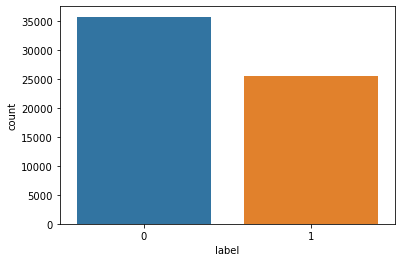

In [103]:
sns.countplot(x='label', data=df)
plt.show()

<ipython-input-99-0f14c643dc65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length1'] = df['sentence1'].apply(len)
<ipython-input-99-0f14c643dc65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length2'] = df['sentence2'].apply(len)


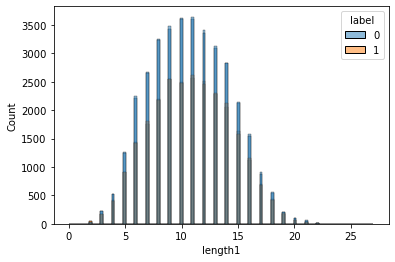

In [99]:
df['length1'] = df['sentence1'].apply(len)
df['length2'] = df['sentence2'].apply(len)
sns.histplot(df, x='length1', hue='label')
sns.histplot(df, x='length2', hue='label')
plt.show()


In [104]:
df = df.drop(['length1', 'length2'], axis=1)
df

,id,sentence1,sentence2,label
0,1,"[paris, october, 1560, secretly, met, english,...","[october, 1560, secretly, met, english, ambass...",0
1,2,"[nba, season, 1975, 76, 30th, season, national...","[1975, 76, season, national, basketball, assoc...",1
2,3,"[also, specific, discussion, public, profile, ...","[also, public, discussion, profile, specific, ...",0
3,4,"[comparable, rate, flow, maintained, result, h...","[result, high, comparable, flow, rate, maintai...",1
4,5,"[seat, zerendi, district, akmola, region]","[seat, district, zerendi, akmola, region]",1
...,...,...,...,...
61382,61385,"[think, hillary, clinton, seth, rich, killed]","[think, seth, rich, hillary, clinton, killed]",0
61383,61386,"[become, attractivepretty]","[become, prettyattractive]",1
61384,61387,"[pakistani, tell, someone, ask, history, pakis...","[pakistani, ask, someone, tell, history, pakis...",0
61385,61388,"[professional, trader, better, investing, nonp...","[nonprofessional, trader, better, investing, p...",0


In [105]:
import sys

print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION', )
from subprocess import call
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
# call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())
print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

__Python VERSION: 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:28:38) [MSC v.1929 64 bit (AMD64)]
__pyTorch VERSION: 2.0.0
__CUDA VERSION
__CUDNN VERSION: 8500
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0
cuda:0


In [107]:
def list_to_string(x):
    if isinstance(x, list):
        return " ".join(x)
    return x

df[['sentence1', 'sentence2']] = data[['sentence1', 'sentence2']].applymap(list_to_string)
df

,id,sentence1,sentence2,label
0,1,"In Paris , in October 1560 , he secretly met t...","In October 1560 , he secretly met with the Eng...",0
1,2,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...,1
2,3,"There are also specific discussions , public p...","There are also public discussions , profile sp...",0
3,4,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...,1
4,5,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...,1
...,...,...,...,...
61382,61385,Do you think Hillary Clinton had Seth Rich kil...,Do you think Seth Rich had Hillary Clinton kil...,0
61383,61386,How do you become attractive/pretty ?,How do you become pretty/attractive ?,1
61384,61387,`` What do a Pakistani will tell when someone ...,What do a Pakistani will ask when someone tell...,0
61385,61388,Are professional traders better at investing t...,Are non-professional traders better at investi...,0


In [108]:
# Split the dataset into training and validation sets
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and prepare the input data
def tokenize_data(data, max_length=128):
    input_ids = []
    attention_masks = []

    for index, row in data.iterrows():
        encoded = tokenizer.encode_plus(row['sentence1'], row['sentence2'], max_length=max_length,
                                        pad_to_max_length=True, truncation=True, return_attention_mask=True)
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return np.array(input_ids), np.array(attention_masks)

train_input_ids, train_attention_masks = tokenize_data(train_data)
val_input_ids, val_attention_masks = tokenize_data(val_data)

# Create PyTorch datasets and data loaders
train_labels = torch.tensor(train_data['label'].values).to(device)
val_labels = torch.tensor(val_data['label'].values).to(device)

train_inputs = torch.tensor(train_input_ids).to(device)
val_inputs = torch.tensor(val_input_ids).to(device)

train_masks = torch.tensor(train_attention_masks).to(device)
val_masks = torch.tensor(val_attention_masks).to(device)

train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
val_dataset = TensorDataset(val_inputs, val_masks, val_labels)

batch_size = 16

train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)


d:\Softwares\Conda\envs\nlp\lib\site-packages\transformers\tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, over

In [109]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.to(device)

# Initialize the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Create a learning rate scheduler
epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [110]:
# Training function
def train_epoch(model, dataloader, optimizer, scheduler, device):
    model.train()
    total_train_loss = 0

    for batch in dataloader:
        input_ids, attention_masks, labels = batch
        model.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    return total_train_loss / len(dataloader)

# Validation function
def validate_epoch(model, dataloader, device):
    model.eval()
    total_val_loss = 0

    for batch in dataloader:
        input_ids, attention_masks, labels = batch

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()

    return total_val_loss / len(dataloader)

# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    
    train_loss = train_epoch(model, train_dataloader, optimizer, scheduler, device)
    print(f"Training Loss: {train_loss:.4f}")

    val_loss = validate_epoch(model, val_dataloader, device)
    print(f"Validation Loss: {val_loss:.4f}")


Epoch 1/3
Training Loss: 0.4622
Validation Loss: 0.2355
Epoch 2/3
Training Loss: 0.2135
Validation Loss: 0.2155
Epoch 3/3
Training Loss: 0.1495
Validation Loss: 0.2505


Accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7207
           1       0.91      0.95      0.93      5071

    accuracy                           0.94     12278
   macro avg       0.93      0.94      0.94     12278
weighted avg       0.94      0.94      0.94     12278



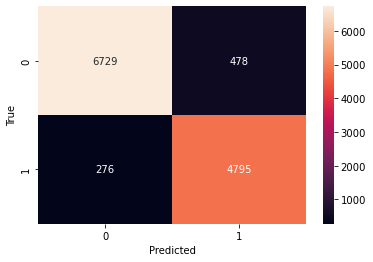

In [111]:
# Evaluation function
def evaluate_model(model, dataloader, device):
    model.eval()
    predictions, true_labels = [], []

    for batch in dataloader:
        input_ids, attention_masks, labels = batch

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_masks)
            logits = outputs.logits

        logits = logits.detach().cpu().numpy()
        labels = labels.to('cpu').numpy()

        predictions.extend(np.argmax(logits, axis=1).flatten())
        true_labels.extend(labels.flatten())

    return predictions, true_labels

# Evaluate the model
predictions, true_labels = evaluate_model(model, val_dataloader, device)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report
print(classification_report(true_labels, predictions))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(true_labels, predictions), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Saving and Testing the model scripts

In [2]:
# Save the model and tokenizer
model_directory = "paraphrase_model"
tokenizer_directory = "paraphrase_tokenizer"

model.save_pretrained(model_directory)
tokenizer.save_pretrained(tokenizer_directory)


In [3]:
def predict_paraphrase(sentence1, sentence2, model, tokenizer, device):
    # Tokenize the input sentences
    encoded = tokenizer.encode_plus(sentence1, sentence2, max_length=128,
                                    pad_to_max_length=True, truncation=True, return_attention_mask=True)
    input_ids = torch.tensor([encoded['input_ids']]).to(device)
    attention_masks = torch.tensor([encoded['attention_mask']]).to(device)

    # Feed the tokenized sentences to the model
    with torch.no_grad():
        outputs = model(input_ids.to(device), attention_mask=attention_masks.to(device))
        logits = outputs.logits

    # Get the prediction
    prediction = torch.argmax(logits, dim=1).item()

    return prediction


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

def load_and_predict_paraphrase(sentence1, sentence2, model_directory, tokenizer_directory, device):
    # Load the saved model and tokenizer
    model = BertForSequenceClassification.from_pretrained(model_directory)
    tokenizer = BertTokenizer.from_pretrained(tokenizer_directory)

    # Move the model to the device
    model.to(device)

    # Use the predict_paraphrase function to make a prediction
    prediction = predict_paraphrase(sentence1, sentence2, model, tokenizer, device)

    return prediction

# Example usage
sentence1 = "In Paris, in October 1560, he secretly met the English ambassador."
sentence2 = "In October 1560, he secretly met with the English ambassador in Paris."

model_directory = "paraphrase_model"
tokenizer_directory = "paraphrase_tokenizer"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

prediction = load_and_predict_paraphrase(sentence1, sentence2, model_directory, tokenizer_directory, device)

if prediction == 1:
    print("The sentences are paraphrases.")
else:
    print("The sentences are not paraphrases.")
